In [16]:
def check_init():
    import platform
    print(platform.python_version())
    import datetime
    now_time = datetime.datetime.now().strftime('%H:%M, %m-%d, %Y')
    print("hello from {} at {}".format(platform.python_version(), now_time))

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# 
# 
# a = np.random.random(10000000)
# b = np.random.random(1)*(1-a)
# c = 1 - a - b
# d = [min(a[i], b[i], c[i]) for i in range(a.shape[0])]
# 
# # avg_min.sort()
# # plt.plot(avg_min)
# print(sum(d)/len(d))

1.15.4
0.23.4
[[ 0.82789425 -0.83848208 -1.81671898 -0.51827132]
 [ 0.14744258 -2.26138034 -0.02658557  0.30248899]
 [-1.19393851  1.29298706  1.08311385 -0.413439  ]
 [-1.68425555 -0.26795625  2.11939887  0.17306757]]
(4, 4)


<AxesSubplot:>

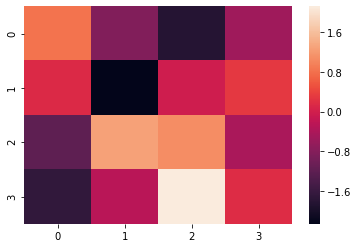

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#! print version
print(np.__version__)
print(pd.__version__)

%matplotlib inline
normal_data = np.random.randn(4,4)
print(normal_data)
print(normal_data.shape)
sns.heatmap(normal_data)

## 绘制核密度估计图
核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。
通过核密度估计图可以比较直观的看出数据样本本身的分布特征,用法如下:

#!seaborn画子图
#定义fig为整个图像
#定义ax_arr是2×2图像中子图的数组
fig, ax_arr = plt.subplots(2,2, figsize=(10,10))
normal_x = np.random.randn(100) #生成100个符合正态分布的数
sns.kdeplot(normal_x, ax=ax_arr[0,0])
sns.kdeplot(normal_x, ax=ax_arr[0,1],cut=0)
sns.distplot(normal_x,ax=ax_arr[1,0])
sns.histplot(normal_x,ax=ax_arr[1,1])
sns.displot(normal_x)


# 树模型

## 梯度提升树 Gradient Boosting Decision Tree

## 分类回归树 Classification And Regression Tree

## 随机森林 Random Forest

## 极度随机树 Extra Trees Classifier
该算法与随机森林算法十分相似，都是由许多决策树构成。
1、随机森林应用的是Bagging模型，而ET是使用所有的训练样本得到每棵决策树，也就是每棵决策树应用的是相同的全部训练样本；
2、随机森林是在一个**随机子集**内得到最佳分叉属性，而ET是**完全随机**的得到分叉值，从而实现对决策树进行分叉的。

# Boosting

## problem
sklearn的决策树不支持使用categorical data, 所以需要手动转换
- 简单转换成1,2,3,4,5等index  
- 转换成Onehot Encoding  
--  使用pd.get_dummies  
--  使用sklearn.preprocessing.OneHotEncoder  
- 或许可以使用hash, 比如sklearn.feature_extraction.**FeatureHasher**  
**example**

#! usage of pd.get_dummies  
s = pd.Series(list('abca'))
print(s)
print(pd.get_dummies(s))
print("-------------------------")
s = ['a','b','c','a']
print(s)
print(pd.get_dummies(s))

In [19]:
from sklearn.tree import DecisionTreeClassifier

data = pd.DataFrame()
data['A'] = ['a','c','b','a']
data['B'] = ['b','c','a','b']
data['C'] = [0, 0, 1, 0]
data['Class'] = ['n','n','y','n']

tree = DecisionTreeClassifier()
print(data[['A','B','C']])
one_hot_data = pd.get_dummies(data[['A','B','C']],drop_first=True)
print(one_hot_data)
tree.fit(one_hot_data, data['Class'])

   A  B  C
0  a  b  0
1  c  c  0
2  b  a  1
3  a  b  0
   C  A_b  A_c  B_b  B_c
0  0    0    0    1    0
1  0    0    1    0    1
2  1    1    0    0    0
3  0    0    0    1    0


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
tree.predict([[0,0,1]])

ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 3 

In [ ]:
data = pd.DataFrame()
data['A'] = ['a','c','b','a']
data['B'] = ['b','c','a','b']
data['C'] = [0, 0, 1, 0]
data['Class'] = ['n','n','y','n']
X_train = data[data.columns.tolist()[:-1]]
y_train = data['Class']
print(data)
mask_maj_train, mask_min_train = (y_train=='n'), (y_train=='y')
print(mask_maj_train)
print(X_train[mask_maj_train])
# pd.DataFrame(X_train).sample(n_under_samples, weights=sample_weights, random_state=random_state)

In [ ]:
check_init()

In [ ]:
from sklearn.model_selection import train_test_split
data_path = "G:\\OneDrive - teleworm\\code\\4research\\datasets\\german-credit\\german.csv"
train_df = pd.read_csv(data_path)
train_df = pd.get_dummies(train_df)
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:, :-1], train_df.iloc[:, -1:],
                                                    stratify=train_df.iloc[:, -1:], test_size=0.2, random_state=66)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      stratify=y_train, test_size=0.25, random_state=66)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

In [ ]:
import pandas as pd
X_train = pd.DataFrame(X_train)
print(X_train.shape)
print((y_train==1).sum())

In [ ]:
y_train = pd.Series((y_train))
print(y_train.shape)

In [ ]:
# X_valid,  y_valid = pd.DataFrame(X_valid), pd.Series(y_valid)
# X_test,   y_test  = pd.DataFrame(X_test),  pd.Series(y_test)

In [ ]:
mask_maj_train,  mask_min_train = (y_train==1), (y_train==2)
mask_maj_valid,  mask_min_valid = (y_valid==1), (y_valid==2)
n_min_samples =  mask_min_train.shape[0]
n_samples = int( n_min_samples* 1)
print(n_samples)
# if n_samples >  mask_maj_train.sum():
#     raise ValueError(f"\
#         Argument 'train_ir' should be smaller than imbalance ratio,\n \
#         Please set this parameter to < { mask_maj_train.sum()/ mask_min_train.sum()}.\
#         ")
# n_samples = n_samples

In [21]:
#!make cs-training data

data_path = "G:\\OneDrive - teleworm\\code\\4research\\datasets\\cs-training.csv"
train_df = pd.read_csv(data_path)
#!删除序号的列
train_df.drop(train_df[['index']],axis=1,inplace=True)
print(train_df.isna().sum())
#!删除月收入缺失值的样本
train_df.drop(train_df[train_df['MonthlyIncome'].isna()==True].index,inplace=True)
#!把家庭成员属性类型改成int
train_df.NumberOfDependents = train_df.NumberOfDependents.astype('int64')
print(train_df.isna().sum())

train_df.to_csv("cs-training-clean.csv",sep=',', encoding='utf-8')
print("done")

label                                       0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64
label                                   0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
done
